# 12. Arquitecturas avanzadas de redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

## 12.1 API funcional de Keras


Modelo base:



In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model_base = Sequential()
model_base.add(Dense(64, activation='relu', input_shape=(784,)))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(10, activation='softmax'))

model_base.summary()



11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Modelo con la *functional API* de Keras:


In [0]:
from tensorflow import keras

inputs  = keras.Input(shape=(784,))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [0]:
from tensorflow.keras import layers

dense1  = layers.Dense(64, activation='relu')(inputs)

In [0]:
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Resumen del modelo:

In [0]:
inputs  = keras.Input(shape=(784,))
dense1  = layers.Dense(64, activation='relu')(inputs)
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [11]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


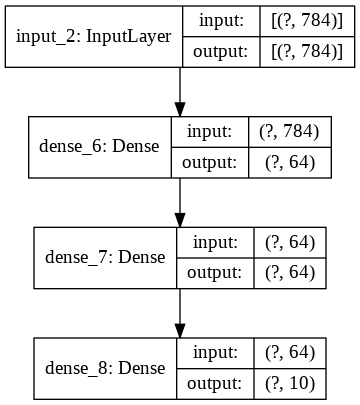

In [12]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2740 - accuracy: 0.9193
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1226 - accuracy: 0.9628
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0874 - accuracy: 0.9733
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0706 - accuracy: 0.9779
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0960 - accuracy: 0.9713


[0.09600311529980972, 0.9713]

Diferentes opciones de uso de la API


In [14]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

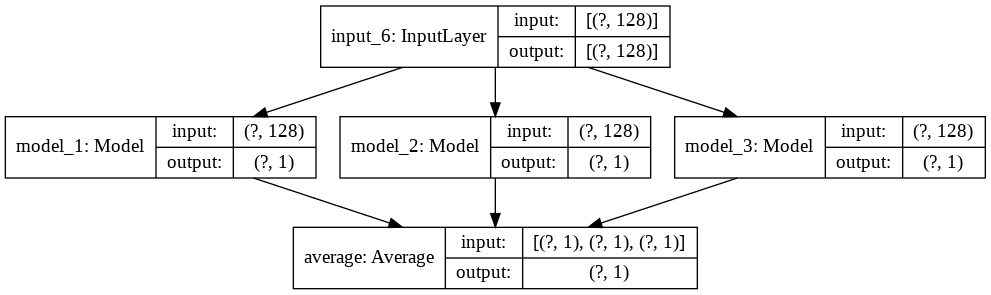

In [15]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

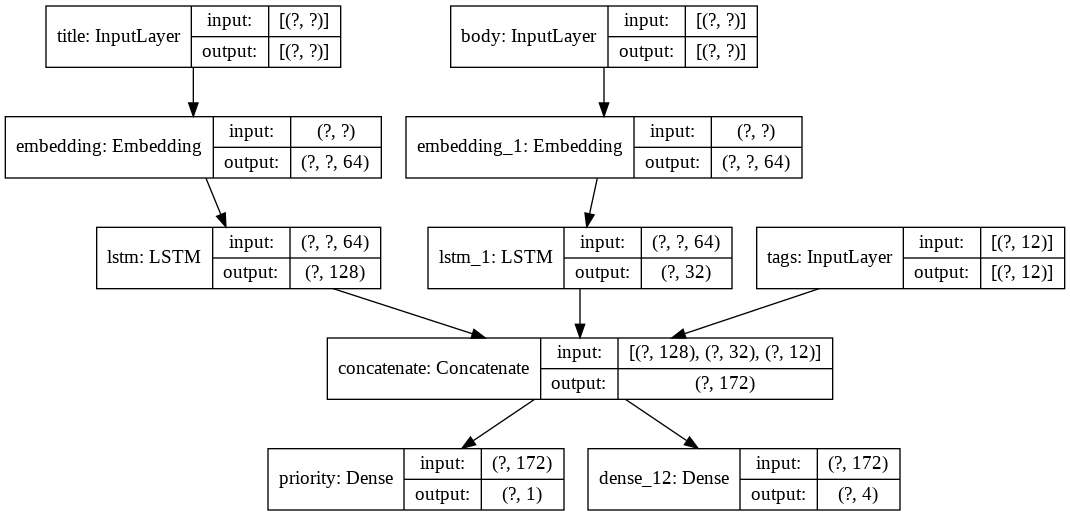

In [16]:
num_tags = 12  
num_words = 10000  
num_departments = 4  

title_input = keras.Input(shape=(None,), name='title') 
body_input = keras.Input(shape=(None,), name='body')  
tags_input = keras.Input(shape=(num_tags,), name='tags')  

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
department_pred = layers.Dense(num_departments, activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

keras.utils.plot_model(model, show_shapes=True)


## 12.2 Redes neuronales preentrenadas

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D


input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, 
                 padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))


In [43]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 56, 56, 256)      

In [0]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')


In [45]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

CIFAR workload

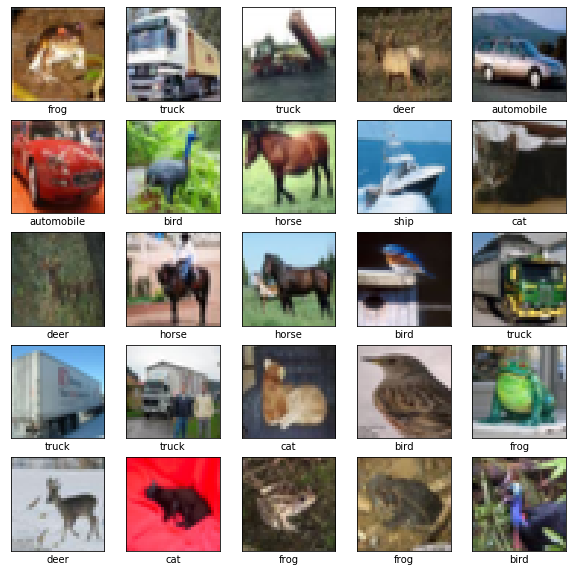

In [46]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
def plot_history(history):
  val_loss = history.history['val_loss' ]
  loss =     history.history['loss' ]
  acc =      history.history['accuracy' ]
  val_acc =  history.history['val_accuracy' ]

  epochs    = range(1,len(acc)+1,1)

  plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
  plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
  plt.title ('Training and validation accuracy')
  plt.ylabel('acc')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()

  plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
  plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
  plt.title ('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()

  

RESNET50 sin preentreno

In [0]:
EPOCHS=10

In [0]:
modelresnet50v2 = tf.keras.applications.ResNet50V2(include_top=True, weights=None,
            input_shape=(32, 32, 3), classes=10)

In [0]:
#modelresnet50v2.summary()


In [0]:
#keras.utils.plot_model(modelresnet50v2)

In [73]:
opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2.fit(train_images, train_labels, epochs=EPOCHS, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 90s 2ms/sample - loss: 2.0170 - accuracy: 0.2737 - val_loss: 1.7832 - val_accuracy: 0.3588
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.6503 - accuracy: 0.4035 - val_loss: 1.5201 - val_accuracy: 0.4491
Epoch 3/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.4999 - accuracy: 0.4592 - val_loss: 1.5671 - val_accuracy: 0.4437
Epoch 4/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.3989 - accuracy: 0.4964 - val_loss: 1.4471 - val_accuracy: 0.4945
Epoch 5/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.3086 - accuracy: 0.5302 - val_loss: 1.3835 - val_accuracy: 0.5017
Epoch 6/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.2255 - accuracy: 0.5617 - val_loss: 1.3119 - val_accuracy: 0.5377
Epoch 7/10
50000/50000 [==============================] 

10000/10000 - 5s - loss: 1.2103 - accuracy: 0.5725
Test Accuracy: 0.5725


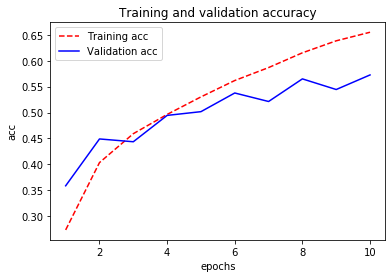

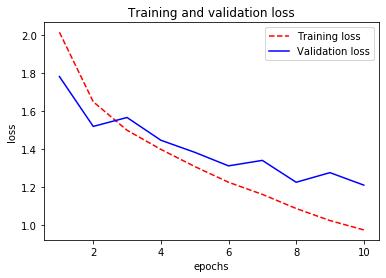

<Figure size 432x288 with 0 Axes>

In [74]:
plot_history(history)

test_loss, test_acc = modelresnet50v2.evaluate(test_images,  test_labels, verbose=2)
print ("Test Accuracy:", test_acc)

RESNET50 with pretrained weight from imagenet

In [0]:
modelresnet50v2pre = tf.keras.Sequential()

modelresnet50v2pre.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))

In [0]:
#modelresnet50v2pre.summary()

In [0]:
modelresnet50v2pre.add(layers.Dense(10, activation="softmax"))

In [0]:
#modelresnet50v2pre.summary()

In [77]:
opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2pre.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2pre.fit(train_images, train_labels, epochs=EPOCHS, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.7905 - accuracy: 0.3788 - val_loss: 1.3926 - val_accuracy: 0.5518
Epoch 2/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.2591 - accuracy: 0.5742 - val_loss: 1.2707 - val_accuracy: 0.6422
Epoch 3/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.0570 - accuracy: 0.6452 - val_loss: 1.0631 - val_accuracy: 0.6761
Epoch 4/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.9533 - accuracy: 0.6800 - val_loss: 0.9741 - val_accuracy: 0.6960
Epoch 5/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.8588 - accuracy: 0.7119 - val_loss: 0.9620 - val_accuracy: 0.7150
Epoch 6/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.7889 - accuracy: 0.7328 - val_loss: 1.0046 - val_accuracy: 0.6625
Epoch 7/10
50000/50000 [==============================] 

10000/10000 - 5s - loss: 0.8531 - accuracy: 0.7357
Test Accuracy: 0.7357


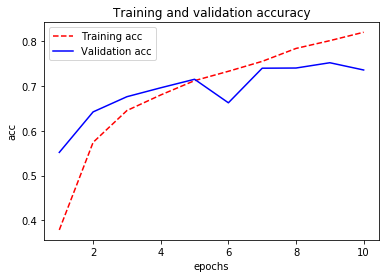

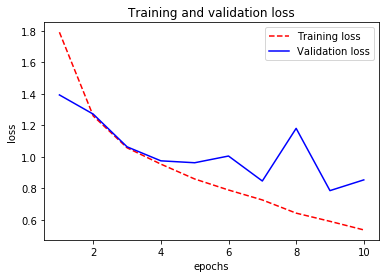

<Figure size 432x288 with 0 Axes>

In [78]:
plot_history(history)

test_loss, test_acc = modelresnet50v2pre.evaluate(test_images,  test_labels, verbose=2)
print ("Test Accuracy:", test_acc)

VGG19

In [79]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.VGG19(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=EPOCHS, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.0229 - accuracy: 0.6406 - val_loss: 0.8570 - val_accuracy: 0.7075
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.6659 - accuracy: 0.7682 - val_loss: 0.6591 - val_accuracy: 0.7702
Epoch 3/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.5556 - accuracy: 0.8062 - val_loss: 0.6154 - val_accuracy: 0.7857
Epoch 4/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.4803 - accuracy: 0.8308 - val_loss: 0.7036 - val_accuracy: 0.7637
Epoch 5/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.4235 - accuracy: 0.8512 - val_loss: 0.5667 - val_accuracy: 0.8073
Epoch 6/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.3760 - accuracy: 0.8677 - val_loss: 0.6189 - val_accuracy: 0.7935
Epoch 7/10
50000/50000 [==============================] 

10000/10000 - 4s - loss: 0.6754 - accuracy: 0.8064
Test Accuracy: 0.8064


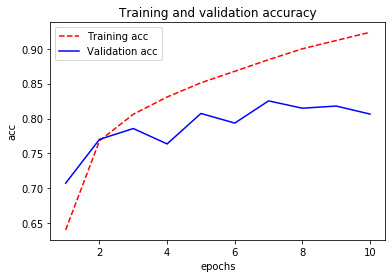

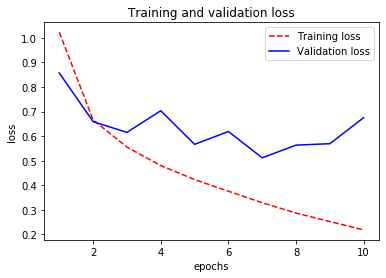

<Figure size 432x288 with 0 Axes>

In [80]:
plot_history(history)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print ("Test Accuracy:", test_acc)